<a href="https://colab.research.google.com/github/DhanaSrivalli/Optimizing-Employee-Attrition-Prediction-with-Feature-Selection-and-Machine-Learning/blob/main/21087223_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREPROCESS, VISUALIZATION AND WITHOUT FEATURE SELECTION OF E_ATTRITION**

In [99]:
pip install matplotlib==3.8.0

In [100]:
pip install seaborn==0.13.2

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as E_AttPan
import seaborn as E_AttSea
import matplotlib.pyplot as E_AttPypl

E_Attrition = E_AttPan.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
E_Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [103]:
E_Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [104]:
print("Employee Attrition Shape: ",E_Attrition.shape)
E_Attrition['Attrition'].value_counts()

Employee Attrition Shape:  (1470, 35)


,count
Attrition,
No,1233
Yes,237


In [105]:
E_Attrition.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [106]:
E_Attrition['BusinessTravel'].nunique()

3

In [107]:
E_Attrition['EmployeeCount'].nunique()

1

In [108]:
E_Attrition['StandardHours'].nunique()

1

In [109]:
### Removing Non-Essential Features, Inspecting for Missing Entries, and Resolving Duplicates
E_Attrition= E_Attrition.drop(['EmployeeCount','StandardHours'], axis=1) ### Removing Two Columns from the DataFrame to Manage Duplicates
print("Missing Values in the E-Attrition: ",E_Attrition.isnull().values.sum())
print("Duplicates in the E-Attrition    : ",E_Attrition.duplicated().sum())
print("Employee Attrition Shape: ",E_Attrition.shape)

Missing Values in the E-Attrition:  0
Duplicates in the E-Attrition    :  0
Employee Attrition Shape:  (1470, 33)


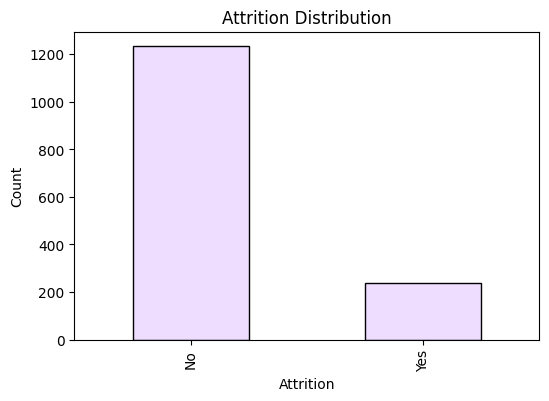

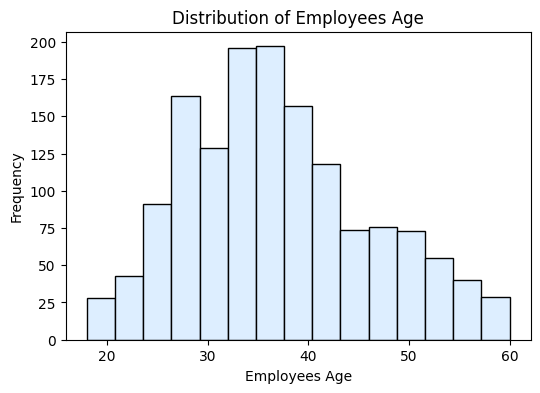

In [110]:
E_AttPypl.figure(figsize=(6, 4))
E_Attrition['Attrition'].value_counts().plot(kind='bar', color='#eeddff', edgecolor='black')
E_AttPypl.title('Attrition Distribution')
E_AttPypl.xlabel('Attrition')
E_AttPypl.ylabel('Count')
E_AttPypl.show()

print("\n\n")
E_AttPypl.figure(figsize=(6, 4))
E_AttPypl.hist(E_Attrition['Age'], bins=15, color='#ddeeff', edgecolor='black')
E_AttPypl.title('Distribution of Employees Age')
E_AttPypl.xlabel('Employees Age')
E_AttPypl.ylabel('Frequency')
E_AttPypl.show()

**1233 Employees have No Attrition but 237 Employees have Attrition.**

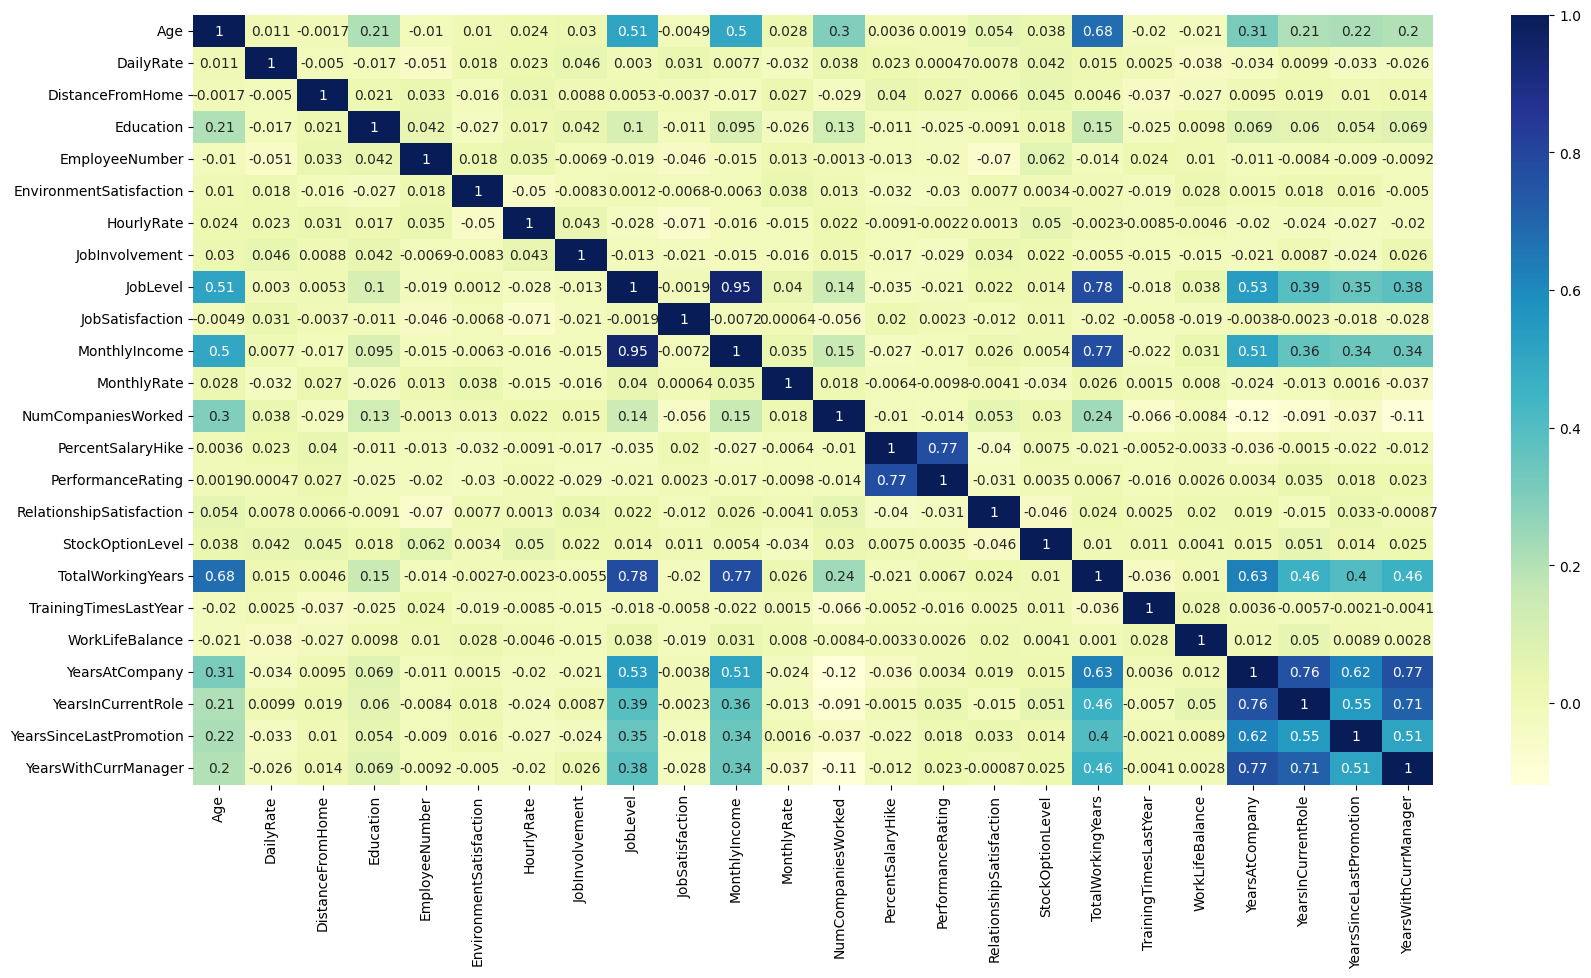

In [111]:
### Visualizing Feature Correlations Using a Heatmap
E_Attrition.corr(numeric_only=True)
E_AttPypl.figure(figsize=(20, 10))
dataplot = E_AttSea.heatmap(E_Attrition.corr(numeric_only=True), cmap="YlGnBu", annot=True)
E_AttPypl.show()

In [112]:
E_Attrition.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [113]:
from sklearn import preprocessing as E_AttPProcess
E_Ob_to_num = E_AttPProcess.LabelEncoder()
E_Attrition['Attrition']= E_Ob_to_num.fit_transform(E_Attrition['Attrition'])
E_Attrition['BusinessTravel']= E_Ob_to_num.fit_transform(E_Attrition['BusinessTravel'])
E_Attrition['Department']= E_Ob_to_num.fit_transform(E_Attrition['Department'])
E_Attrition['EducationField']= E_Ob_to_num.fit_transform(E_Attrition['EducationField'])
E_Attrition['Gender']= E_Ob_to_num.fit_transform(E_Attrition['Gender'])
E_Attrition['JobRole']= E_Ob_to_num.fit_transform(E_Attrition['JobRole'])
E_Attrition['MaritalStatus']= E_Ob_to_num.fit_transform(E_Attrition['MaritalStatus'])
E_Attrition['Over18']= E_Ob_to_num.fit_transform(E_Attrition['Over18'])
E_Attrition['OverTime']= E_Ob_to_num.fit_transform(E_Attrition['OverTime'])

### Applying the SMOTE Oversampling Technique to Balance the Employee Attrition Dataset.

In [114]:
from collections import Counter as E_AttCount
from imblearn.over_sampling import SMOTE as E_AttSTE
E_AttritionX = E_Attrition.drop('Attrition',axis=1)
E_AttritionY = E_Attrition['Attrition']

print('Attrition Categories  %s' % E_AttCount(E_AttritionY))
Att_EMod = E_AttSTE()
E_AttritionX, E_AttritionY = Att_EMod.fit_resample(E_AttritionX, E_AttritionY)
print('Balanced Attrition Categories %s' % E_AttCount(E_AttritionY))
E_Attrition = E_AttPan.concat([E_AttritionX, E_AttritionY], axis=1)

print("\nEmployee Attrition Shape: ",E_Attrition.shape)
E_Attrition['Attrition'].value_counts()

Attrition Categories  Counter({0: 1233, 1: 237})
Balanced Attrition Categories Counter({1: 1233, 0: 1233})

Employee Attrition Shape:  (2466, 33)


,count
Attrition,
1,1233
0,1233


In [115]:
E_Attrition.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [116]:
E_Attrition.to_csv('E_Attrition.csv', index=False)
E_Attrition

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,2,0,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,2,3,1,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,4,1,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,5,4,0,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,7,1,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,23,2,1027,1,15,2,1,1150,3,0,...,1,1,1,2,1,0,0,0,0,1
2462,19,1,492,1,1,2,2,341,1,0,...,3,0,1,3,2,1,0,1,0,1
2463,30,2,900,1,16,1,2,444,2,1,...,3,0,4,3,2,3,2,0,1,1
2464,20,2,234,1,2,3,1,447,3,1,...,2,0,0,2,3,0,0,0,0,1


In [117]:
from sklearn.model_selection import train_test_split as E_AttTSpl
E_AttritionX = E_Attrition.drop('Attrition',axis=1)
E_AttritionY = E_Attrition['Attrition']

### Splitting the Data into 70% for Training, 15% for Validation, and 15% for Testing

E_AttritionXtrn, E_AttritiontXtst, E_AttritionYtrn, E_AttritionYtst = E_AttTSpl(E_AttritionX,E_AttritionY,test_size=0.3,random_state= 7)
E_AttritionXvld, E_AttritiontXtst, E_AttritionYvld, E_AttritionYtst = E_AttTSpl(E_AttritiontXtst,E_AttritionYtst,test_size=0.5,random_state= 7)
print("\nTraining Samples for E_Attrition: ",E_AttritionXtrn.shape)
print("Validation Samples for E_Attrition: ",E_AttritionXvld.shape)
print("Testing Samples for E_Attrition: ",E_AttritiontXtst.shape)


Training Samples for E_Attrition:  (1726, 32)
Validation Samples for E_Attrition:  (370, 32)
Testing Samples for E_Attrition:  (370, 32)


In [118]:
from sklearn.model_selection import GridSearchCV as E_AttGsss
from sklearn import metrics as support_mtr
from sklearn.metrics import confusion_matrix as E_AttMx
from sklearn.metrics import ConfusionMatrixDisplay as Att_EMDS
from sklearn.metrics import classification_report as E_AttCR
import warnings as Att_EWARN
Att_EWARN.filterwarnings("ignore")

**Gradient Boosting without Feature Selection**

{'learning_rate': 0.3, 'loss': 'exponential', 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       193
           1       0.89      0.93      0.91       177

    accuracy                           0.91       370
   macro avg       0.91      0.91      0.91       370
weighted avg       0.91      0.91      0.91       370



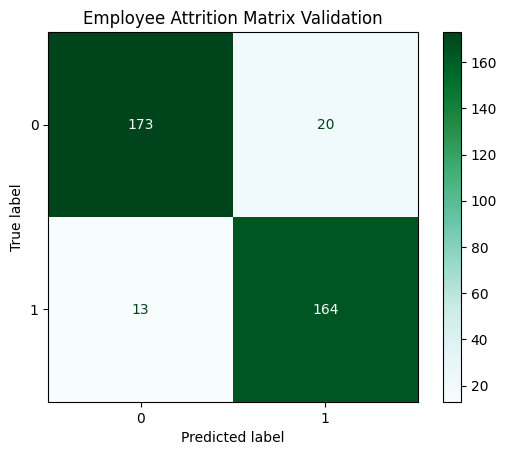

FPR for Validation E_Attrition: 0.10362694300518134
FNR for Validation E_Attrition: 0.07344632768361582


In [119]:
from sklearn.ensemble import GradientBoostingClassifier as E_AttGrb

Att_Eprm = { 'loss':['log_loss', 'exponential'],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn)  ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       156
           1       0.94      0.88      0.91       214

    accuracy                           0.90       370
   macro avg       0.89      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370



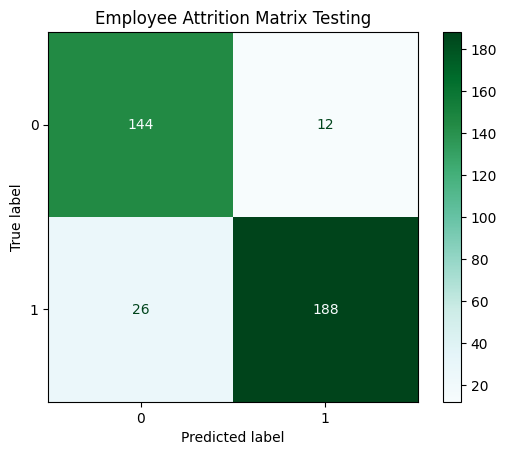

FPR for Testing E_Attrition: 0.07692307692307693
FNR for Testing E_Attrition: 0.12149532710280374


In [120]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

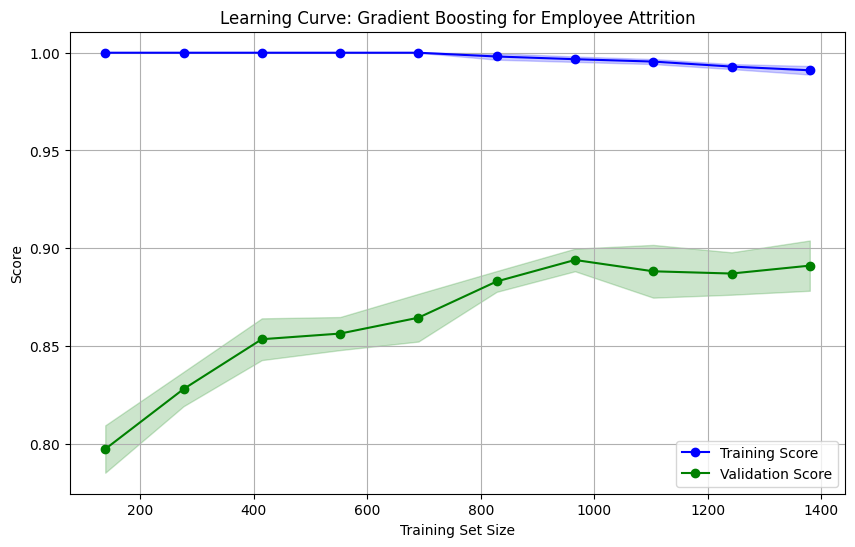

In [121]:
from sklearn.model_selection import learning_curve as AttLearnCurve
import numpy as E_Attnu

def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="GB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="green", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttGrb(learning_rate= 0.1, loss= 'log_loss', n_estimators= 200) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Gradient Boosting for Employee Attrition",
    cv=5
)

**Hist.Gradient Boosting Without Feature Selection**

{'learning_rate': 0.3, 'max_depth': 8, 'max_iter': 200}
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       193
           1       0.92      0.93      0.92       177

    accuracy                           0.92       370
   macro avg       0.92      0.92      0.92       370
weighted avg       0.92      0.92      0.92       370



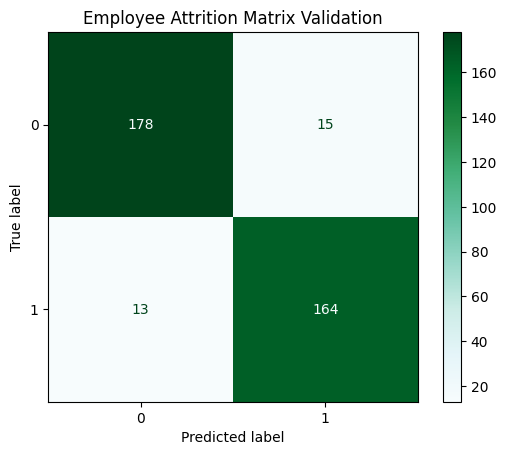

FPR for Validation E_Attrition: 0.07772020725388601
FNR for Validation E_Attrition: 0.07344632768361582


In [122]:
from sklearn.ensemble import HistGradientBoostingClassifier as E_AttHisGrb

Att_Eprm = {'learning_rate': [0.1, 0.3, 0.8],'max_iter':[100,200,350],'max_depth':[2,5,8,9]}
Att_EMod = E_AttHisGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttHisGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       156
           1       0.96      0.90      0.93       214

    accuracy                           0.92       370
   macro avg       0.91      0.92      0.91       370
weighted avg       0.92      0.92      0.92       370



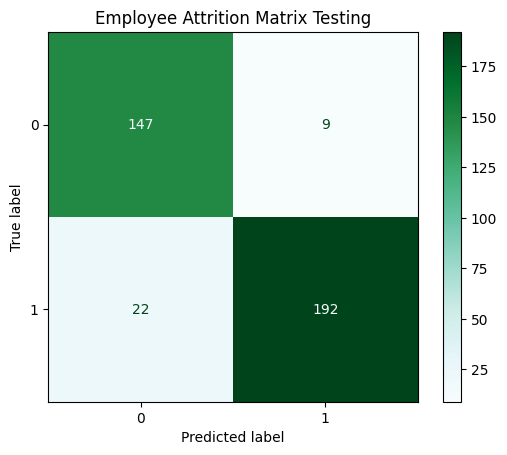

FPR for Testing E_Attrition: 0.057692307692307696
FNR for Testing E_Attrition: 0.102803738317757


In [123]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###  Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

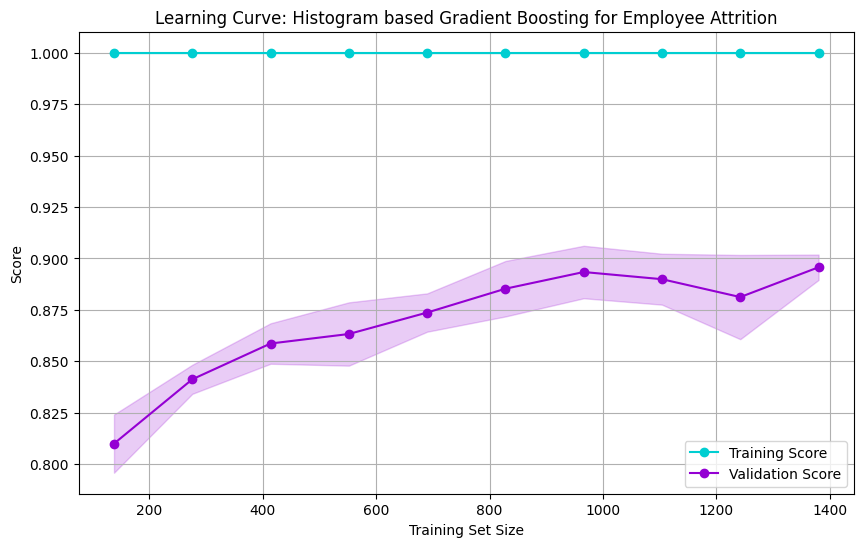

In [124]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="HistGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttHisGrb(learning_rate= 0.8, max_depth= 2, max_iter= 200) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Histogram based Gradient Boosting for Employee Attrition",
    cv=5
)

**Extreme Gradient Boosting Without Feature Selection**

In [125]:
pip install scikit-learn==1.3.0

In [126]:
pip install xgboost==2.1.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       193
           1       0.91      0.92      0.91       177

    accuracy                           0.91       370
   macro avg       0.91      0.91      0.91       370
weighted avg       0.91      0.91      0.91       370



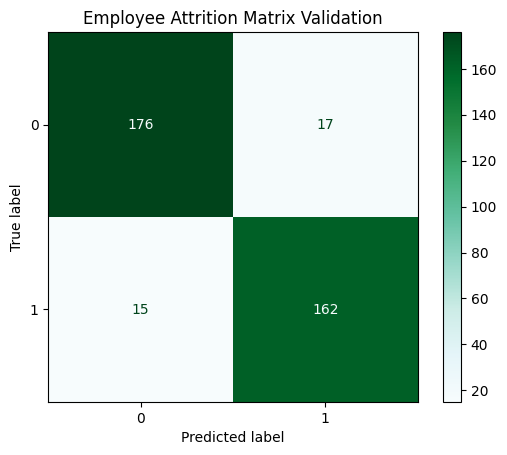

FPR for Validation E_Attrition: 0.08808290155440414
FNR for Validation E_Attrition: 0.0847457627118644


In [127]:
from xgboost import XGBClassifier as E_AttExGrb

Att_Eprm = { 'max_depth':[2,5,7,9],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttExGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttExGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       156
           1       0.93      0.87      0.90       214

    accuracy                           0.89       370
   macro avg       0.88      0.89      0.88       370
weighted avg       0.89      0.89      0.89       370



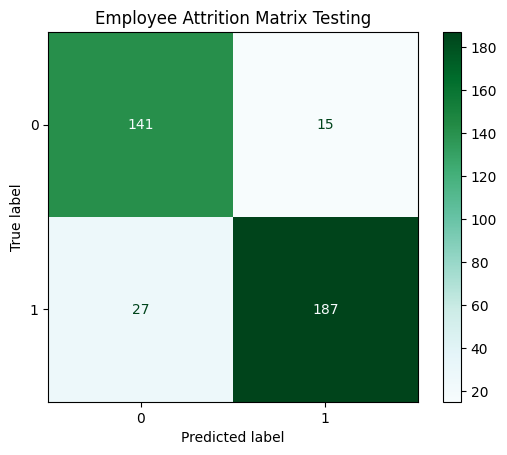

FPR for Testing E_Attrition: 0.09615384615384616
FNR for Testing E_Attrition: 0.1261682242990654


In [128]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")

print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

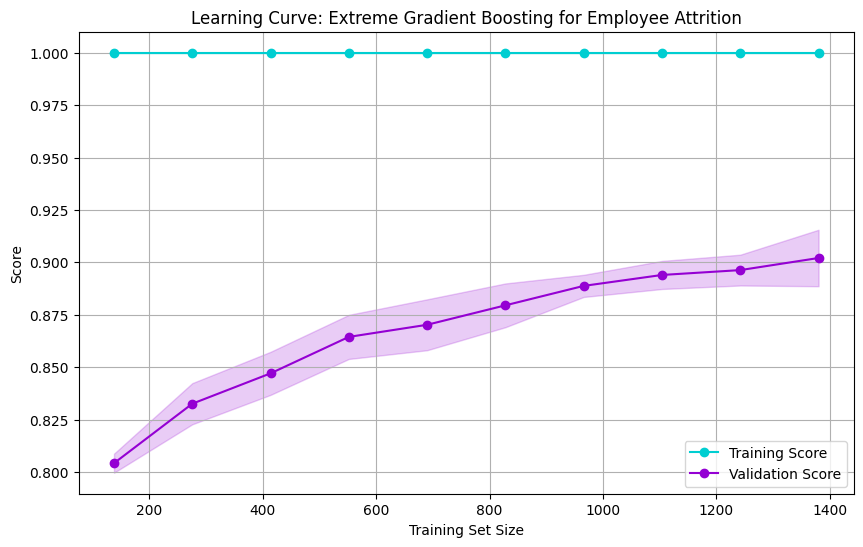

In [129]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="XGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttExGrb(learning_rate= 0.1, max_depth= 9, n_estimators= 200) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Extreme Gradient Boosting for Employee Attrition",
    cv=5
)